In [1]:
# In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using
# XGBoost. The description of the dataset is as follows:
    
#     Data Set Information:
#         Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted 
#         using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
            
#     Attribute Information:
    
#         Listing of attributes:
#             >50K, <=50K.
#             age: continuous.
#             workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
#             fnlwgt: continuous.
#             education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, 
#                        Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
#             education-num: continuous.
#             marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, 
#                             Married-AF-spouse.
#             occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,
#                         Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv,
#                         Armed-Forces.
#             relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
#             race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
#             sex: Female, Male.
#             capital-gain: continuous.
#             capital-loss: continuous.
#             hours-per-week: continuous.
#             native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India,
#                             Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam,
#                             Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, 
#                             Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, 
#                             Peru, Hong, Holand-Netherlands.
                            
# Following is the code to load required libraries and data:
#     import numpy as np
#     import pandas as pd
#     train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
#     test_set =  pd.read_csv(' http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, 
#                 header = None)
#     col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship',
#                   'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
#     train_set.columns = col_labels
#     test_set.columns = col_labels

# Load libraries

In [2]:
# Core Libraries - Data manipulation and analysis
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
  
# Core Libraries - Machine Learning
import sklearn
import xgboost as xgb


# Importing Classifiers - Modelling
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier

## Importing train_test_split,cross_val_score,GridSearchCV,KFold - Validation and Optimization
from sklearn.model_selection import  train_test_split, cross_val_score, GridSearchCV, KFold 


# Importing Metrics - Performance Evaluation
from sklearn import metrics

# Warnings Library - Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set =  pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, 
                header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship',
                  'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

# Understand the Dataset and Data

In [4]:
train_set.shape,test_set.shape

((32561, 15), (16281, 15))

In [5]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [6]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
test_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [8]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [11]:
train_set.get_dtype_counts()

int64     6
object    9
dtype: int64

In [12]:
test_set.get_dtype_counts()

int64     6
object    9
dtype: int64

# Clean the data

## Clean Column Names

In [13]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [14]:
test_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

***The columns don't have any nonsensical values, therefore there is no need to clean or change column names***

## Clean Numerical Columns

### Null values

In [15]:
num_cols = train_set.select_dtypes(include="int64").columns.values
# num_cols = test_set.select_dtypes(include="int64").columns.values can also be used because the columns are the same


In [16]:
train_set[num_cols].isna().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [17]:
test_set[num_cols].isna().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

***No null values in the numerical columns of both the train_set and test_set***

### Zeros

**Check if there are any rows with all row values = zero that need our consideration so that we can decide to study those rows**

In [18]:
train_set.loc[(train_set==0).all(axis=1),num_cols].shape

(0, 6)

In [19]:
test_set.loc[(train_set==0).all(axis=1),num_cols].shape

(0, 6)

***There are no rows which have all row values == 0***

**Check if there are any rows with any row values = zero that need our consideration so that we can decide to study those rows**

In [20]:
train_set.loc[(train_set==0).any(axis=1),num_cols].shape

(32561, 6)

In [21]:
train_set.loc[(train_set==0).any(axis=1),num_cols].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [22]:
train_set.loc[(train_set.drop(["capital_gain", "capital_loss"],axis=1)==0).any(axis=1),num_cols].shape

(0, 6)

In [23]:
test_set.loc[(train_set==0).any(axis=1),num_cols].shape

(16281, 6)

In [24]:
test_set.loc[(test_set.drop(["capital_gain", "capital_loss"],axis=1)==0).any(axis=1),num_cols].shape

(0, 6)

***There are no rows which have any row values == 0, except in captital_gain, capital_loss columns(where 0 is a valid value)***

### Nonsensical values

## Clean Categorical Columns

### Null values

In [25]:
cat_cols = train_set.select_dtypes(include="object").columns.values
cat_cols

array(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'wage_class'],
      dtype=object)

In [26]:
train_set[cat_cols].isna().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
wage_class        0
dtype: int64

In [27]:
test_set[cat_cols].isna().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
wage_class        0
dtype: int64

### Empty Values

In [28]:
train_set.loc[(train_set=="").any(axis=1),cat_cols].shape

(0, 9)

In [29]:
test_set.loc[(train_set=="").any(axis=1),cat_cols].shape

(0, 9)

***There are no empty strings in any of the rows***

### Nonsensical values 

In [30]:
train_set[cat_cols].nunique()

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
wage_class         2
dtype: int64

In [31]:
for col in cat_cols:
    print(train_set[col].unique(),"\n")

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

[' Male' ' Female'] 

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canad

***The columns workclass, occupation and native_country have rows that have garbage values which need to be imputed or dropped in the train_set***

In [32]:
test_set['workclass'].unique()

array([' Private', ' Local-gov', ' ?', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [33]:
for col in cat_cols:
    print(test_set[col].unique(),"\n")

[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool'] 

[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse'] 

[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces'] 

[' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative'] 

[' Black' ' White' ' Asian-Pac-Islander' ' Other' ' Amer-Indian-Eskimo'] 

[' Male' ' Female'] 

[' United-States' ' ?' ' Peru' ' Guatemala' ' Mexico'
 ' Dominican-Republic' ' Ireland' ' Germany' ' Philippines' ' 

***The columns workclass, occupation and native_country have rows that have garbage values which need to be imputed or dropped in the test_set***

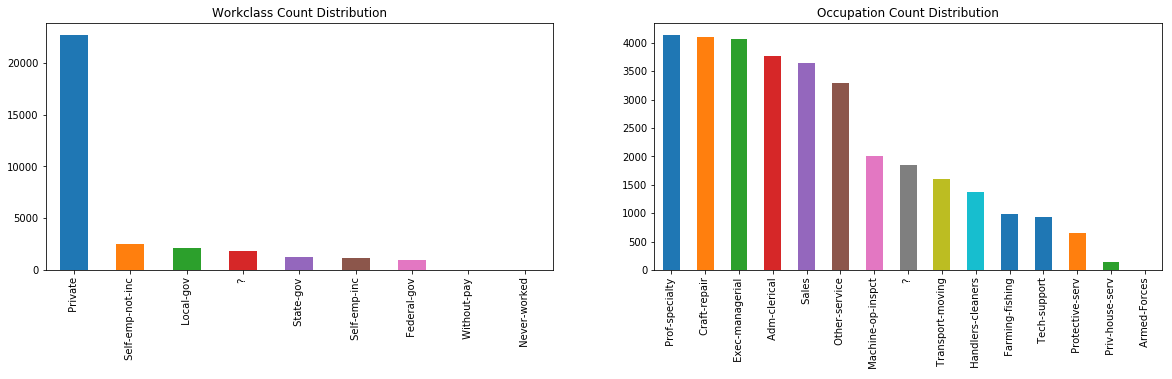

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1) 
plt.title("Workclass Count Distribution")
train_set['workclass'].value_counts().plot.bar()

plt.subplot(2,2,2) 
plt.title("Occupation Count Distribution")
train_set['occupation'].value_counts().plot.bar()

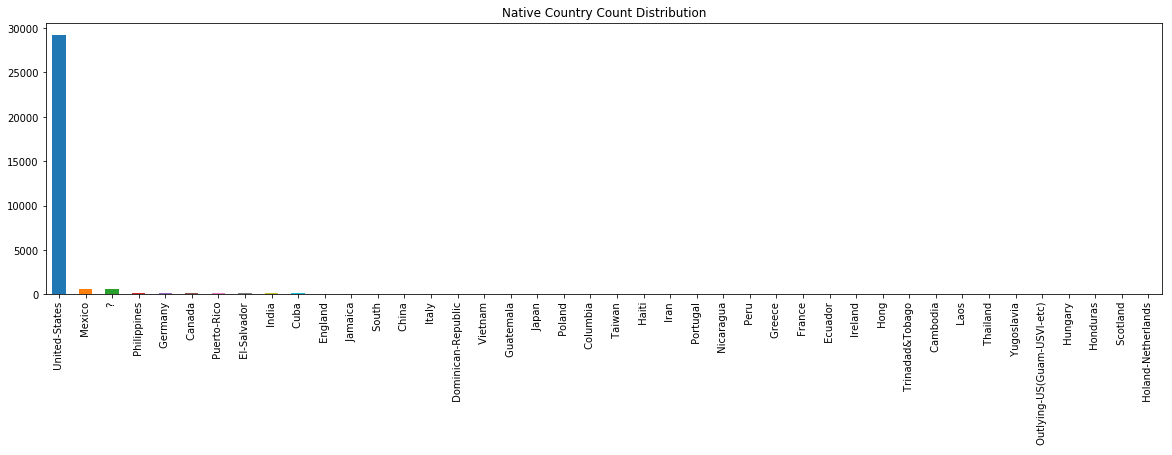

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(1,1,1) 
plt.title("Native Country Count Distribution")
train_set['native_country'].value_counts().plot.bar()

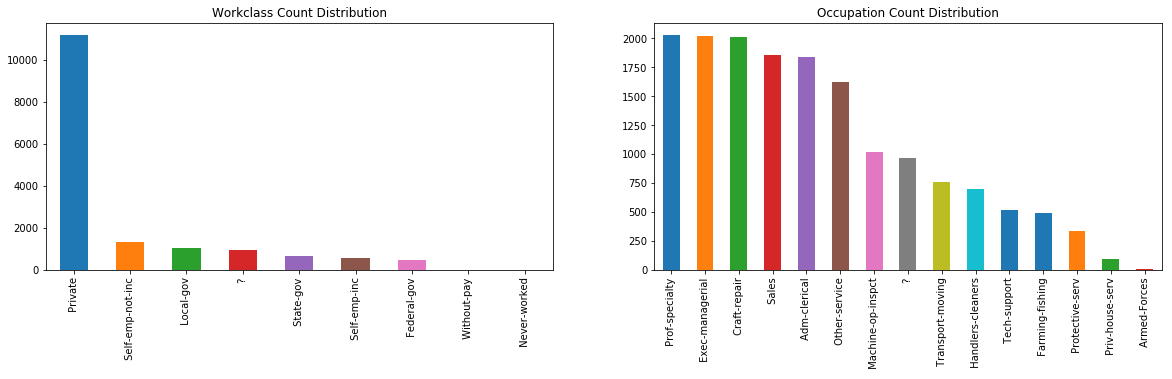

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1) 
plt.title("Workclass Count Distribution")
test_set['workclass'].value_counts().plot.bar()

plt.subplot(2,2,2) 
plt.title("Occupation Count Distribution")
test_set['occupation'].value_counts().plot.bar()

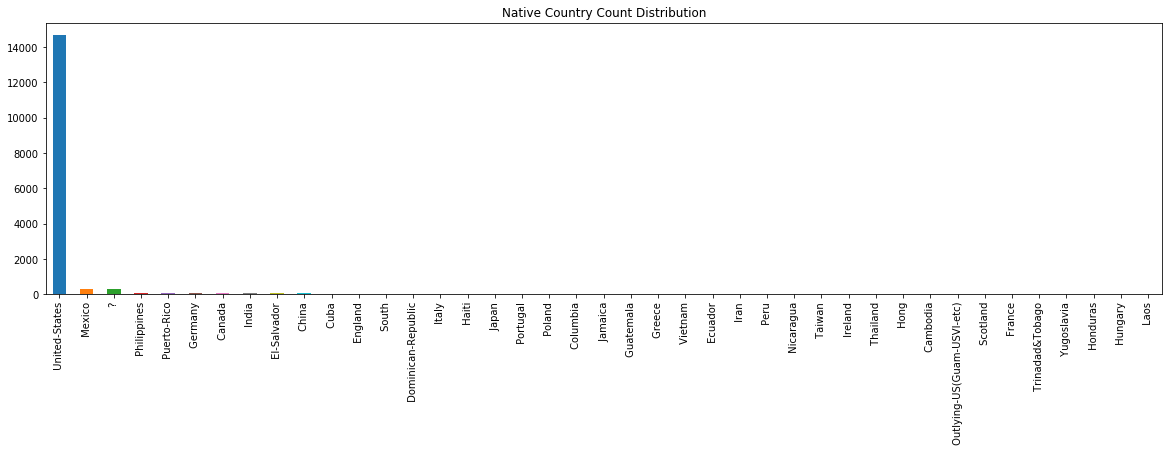

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1,1,1) 
plt.title("Native Country Count Distribution")
test_set['native_country'].value_counts().plot.bar()

In [38]:
train_set[train_set.workclass.str.contains("\?")].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K


In [39]:
test_set[test_set.workclass.str.contains("\?")].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K.
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K.
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K.


In [40]:
(train_set.loc[(train_set==" ?").any(axis=1),cat_cols].shape[0]/train_set.shape[0])*100

7.367709836921471

In [41]:
(test_set.loc[(test_set==" ?").any(axis=1),cat_cols].shape[0]/test_set.shape[0])*100

7.499539340335361

***If we drop the rows containing ? values, we incur a data loss of approximately 7.5% data loss in the train_set and the test_set. Therefore we choose to drop it***

In [42]:
train_set.drop(train_set.loc[(train_set==" ?").any(axis=1)].index, inplace= True)
train_set.shape[0]

30162

In [43]:
test_set.drop(test_set.loc[(test_set==" ?").any(axis=1)].index, inplace= True)
test_set.shape[0]

15060

In [44]:
test_set.loc[(test_set==" ?").any(axis=1),cat_cols].shape[0]/test_set.shape[0]

0.0

# Get Basic Statistical Information

In [45]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [46]:
train_set.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,30162,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22286,9840,14065,4038,12463,25933,20380,27504,22654


In [47]:
test_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,15060.000000,1.506000e+04,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,1.896164e+05,10.112749,1120.301594,89.041899,40.951594
std,13.380676,1.056150e+05,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.166550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.385888e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [48]:
test_set.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,15060,15060,15060,15060,15060,15060,15060,15060,15060
unique,7,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K.
freq,11021,4943,6990,1992,6203,12970,10147,13788,11360


In [49]:
train_set.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education_num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital_gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital_loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours_per_week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


In [50]:
test_set.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.074375,0.026123,0.078760,0.057745,0.102758
fnlwgt,-0.074375,1.000000,-0.036010,-0.012839,0.006421,-0.010306
education_num,0.026123,-0.036010,1.000000,0.131750,0.085817,0.133691
capital_gain,0.078760,-0.012839,0.131750,1.000000,-0.031876,0.090501
capital_loss,0.057745,0.006421,0.085817,-0.031876,1.000000,0.057712
hours_per_week,0.102758,-0.010306,0.133691,0.090501,0.057712,1.000000


# Explore Data

## Uni-variate

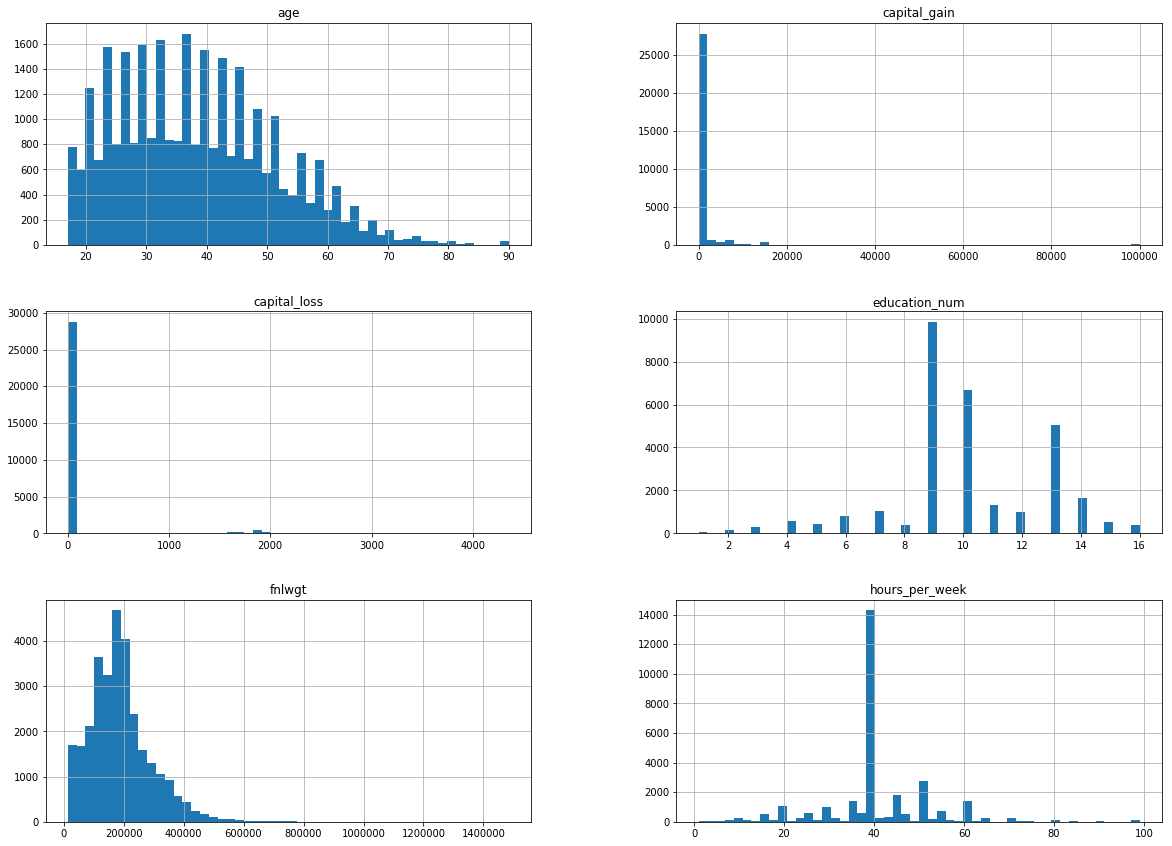

In [51]:
train_set[num_cols].hist(bins=50, figsize=(20,20), layout=(4,2))
plt.show()

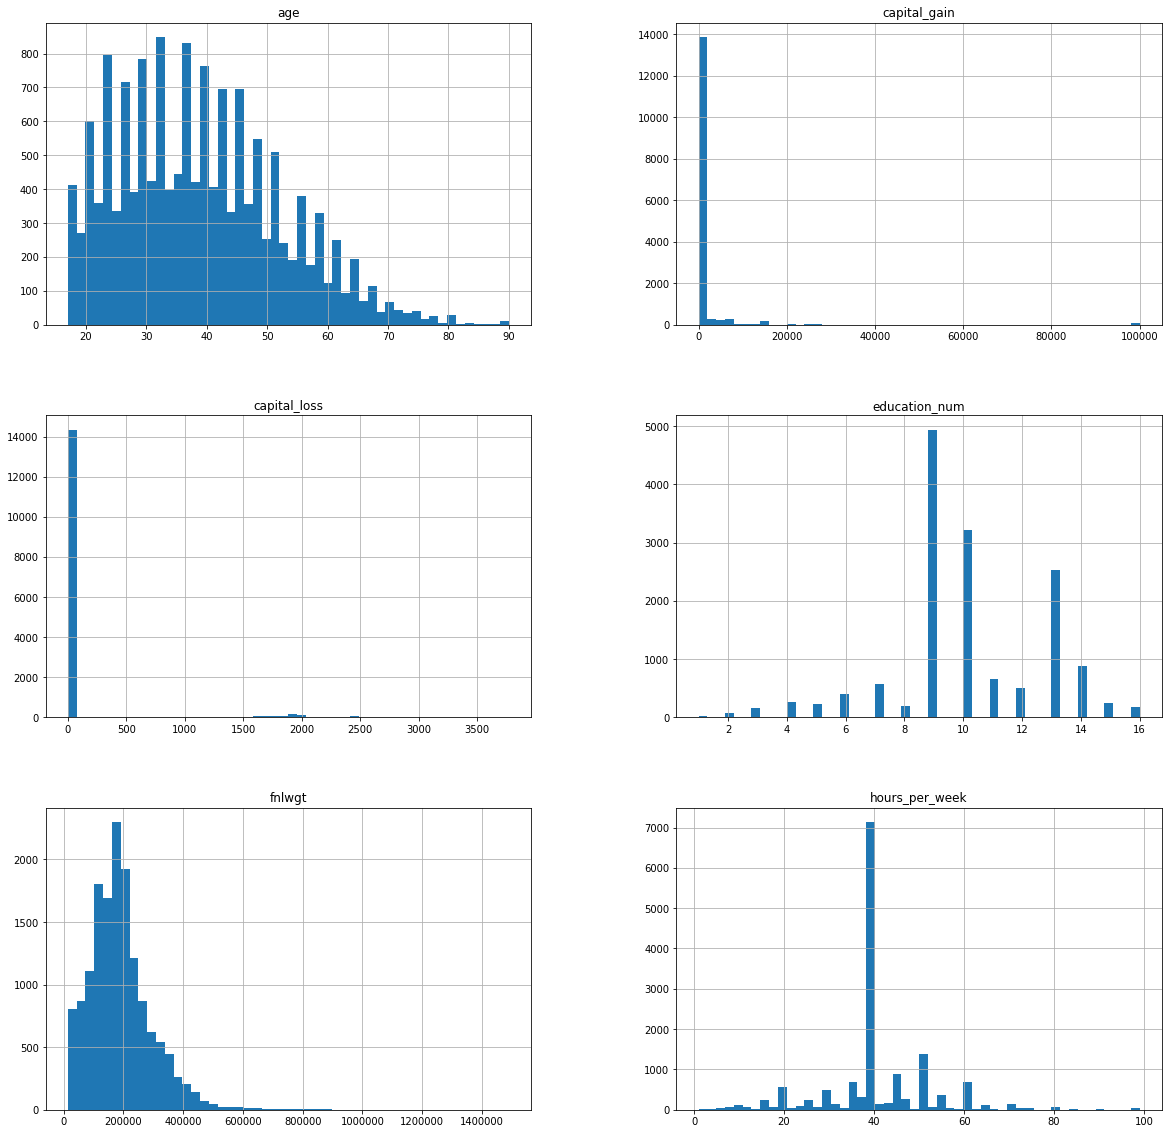

In [52]:
test_set[num_cols].hist(bins=50, figsize=(20,20), layout=(3,2))
plt.show()

### Categorical Columns

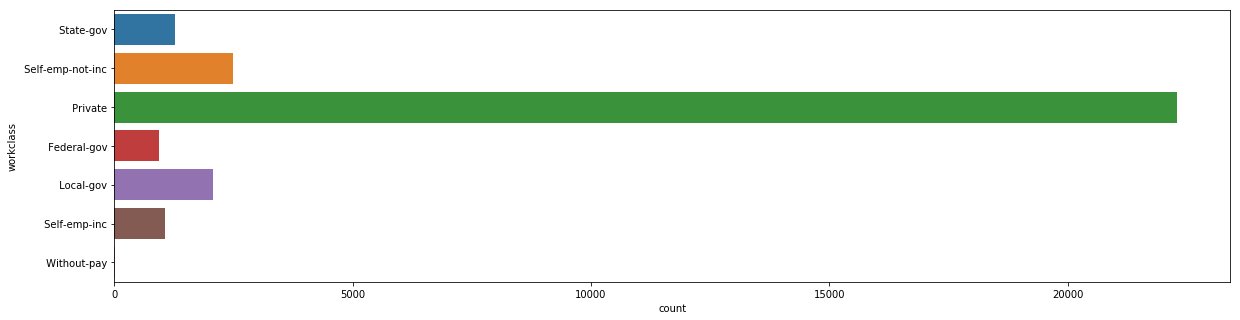

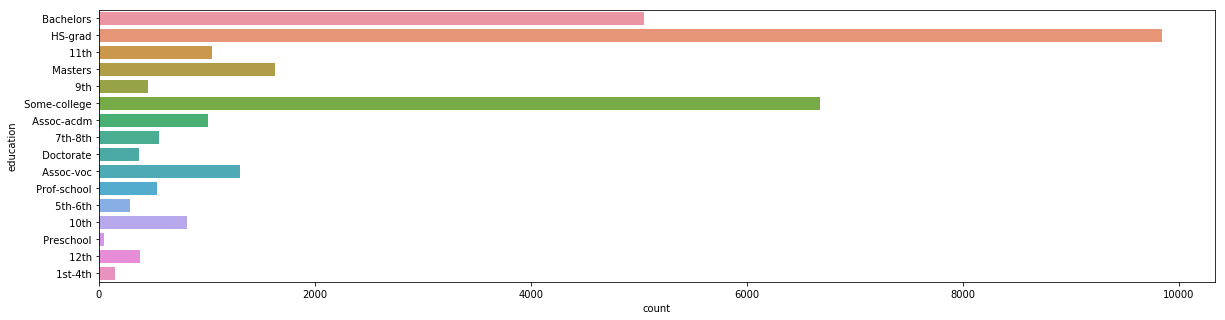

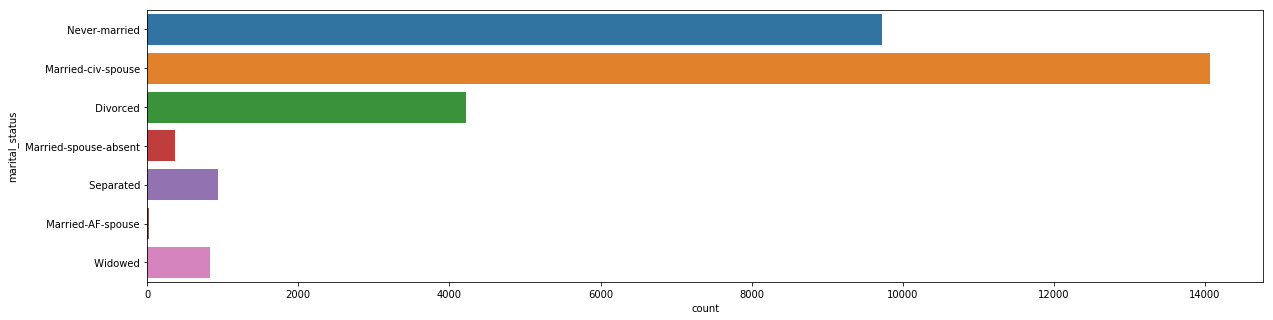

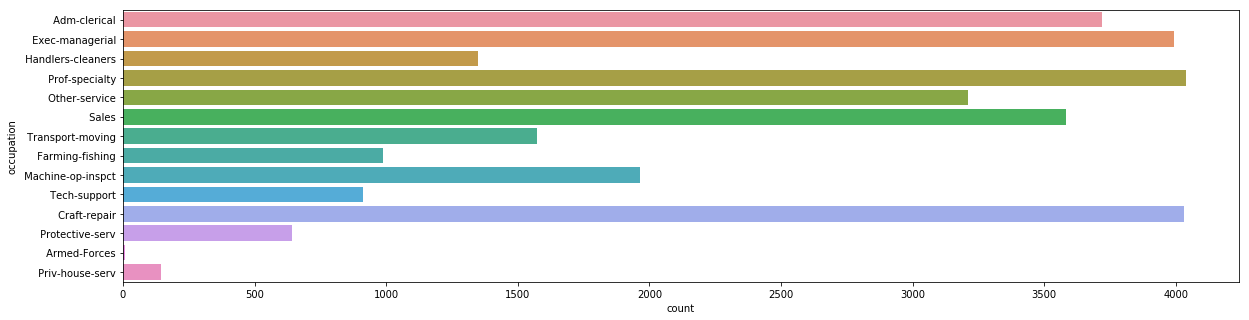

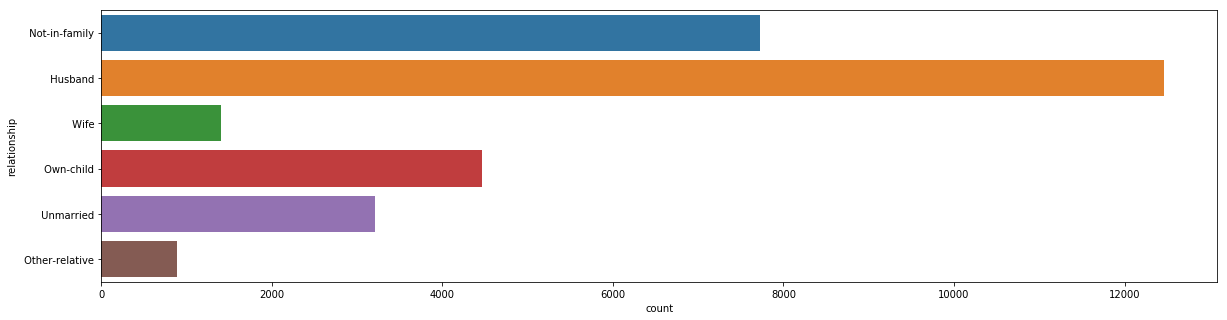

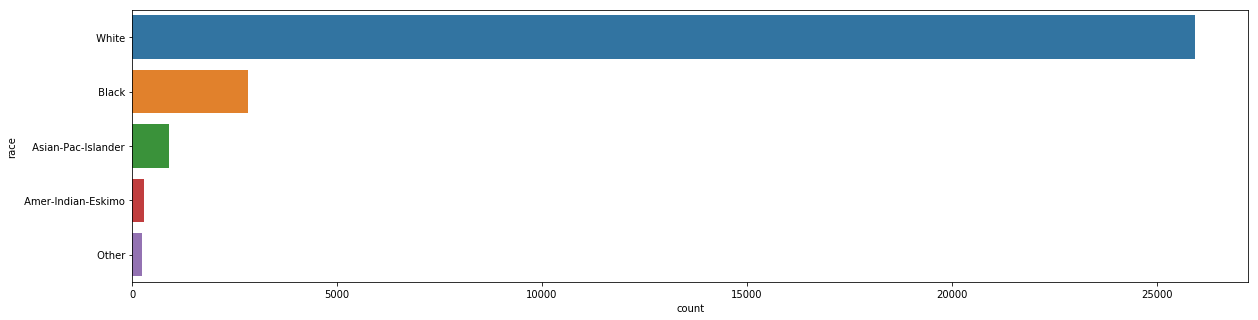

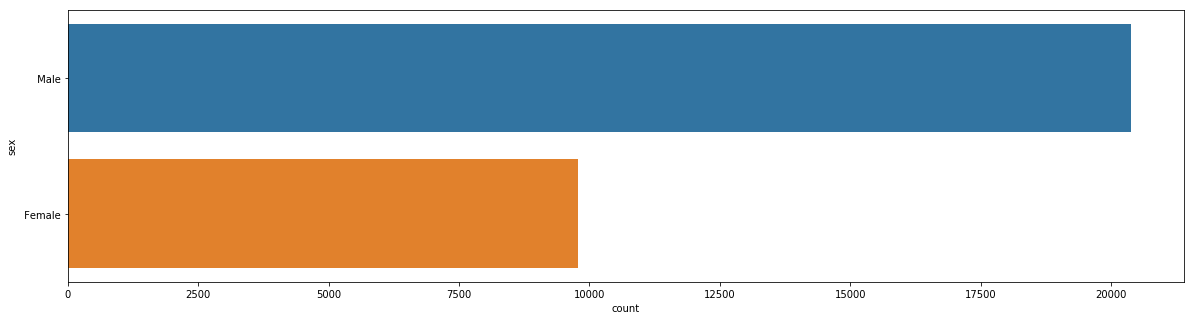

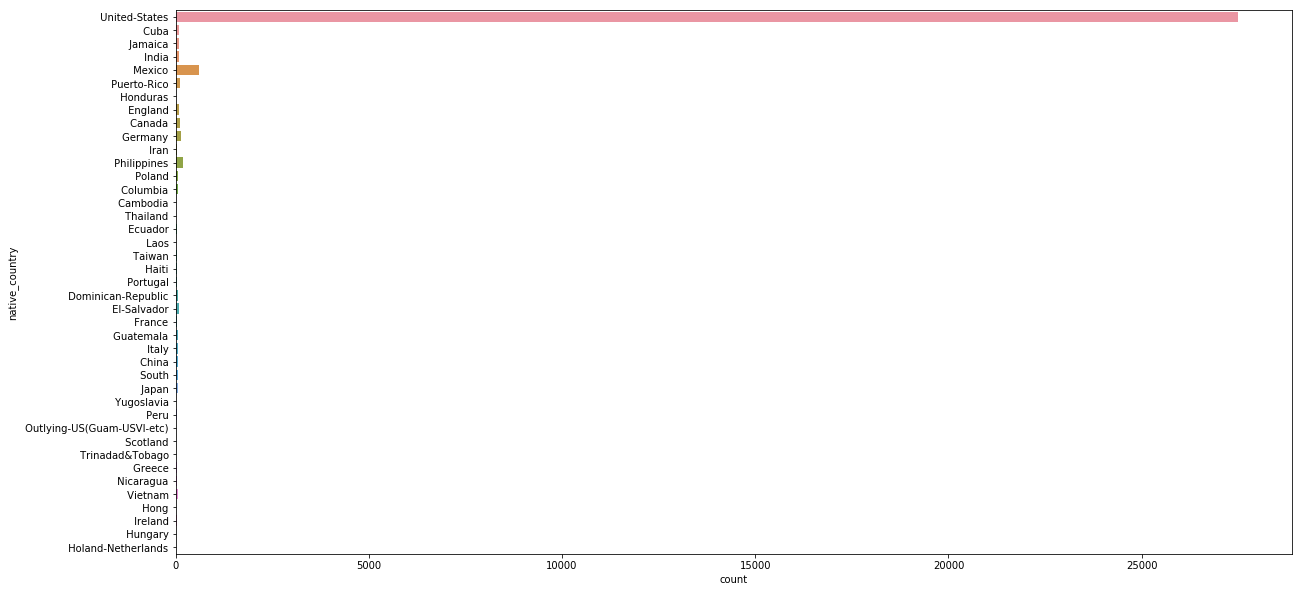

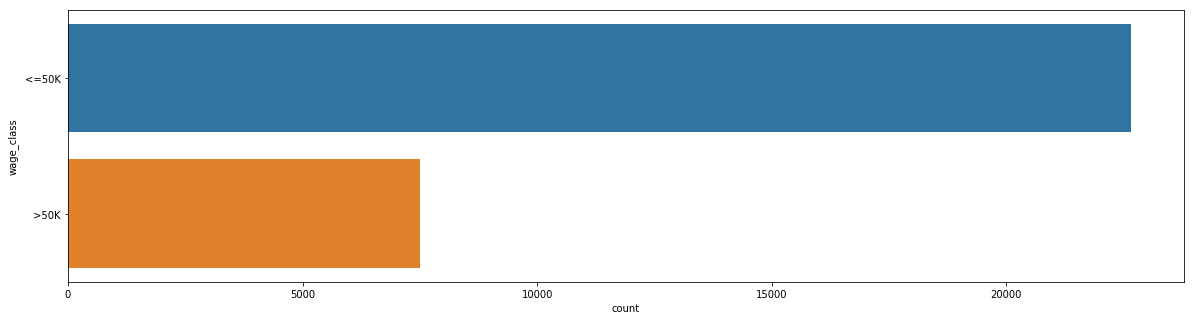

In [53]:
for i, col in enumerate(cat_cols):
    if(col!='native_country'):
        plt.figure(i,figsize = (20,5))
        sns.countplot(y=col, data=train_set,)
    else:
        plt.figure(i,figsize = (20,10))
        sns.countplot(y=col, data=train_set)

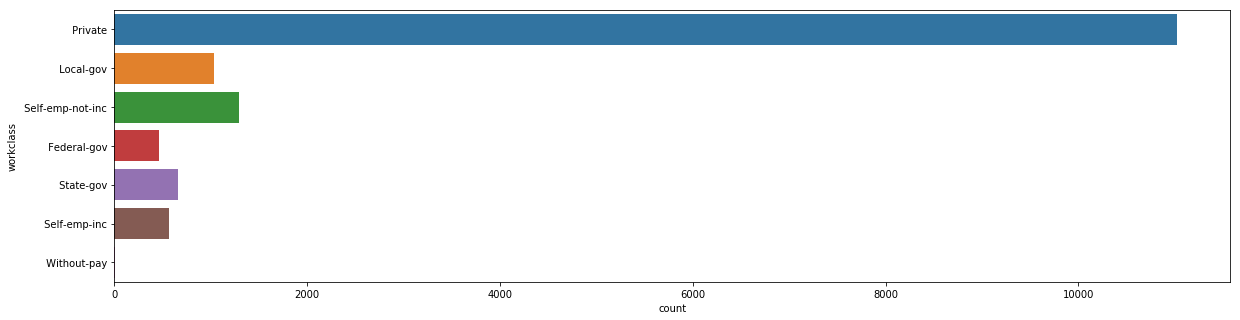

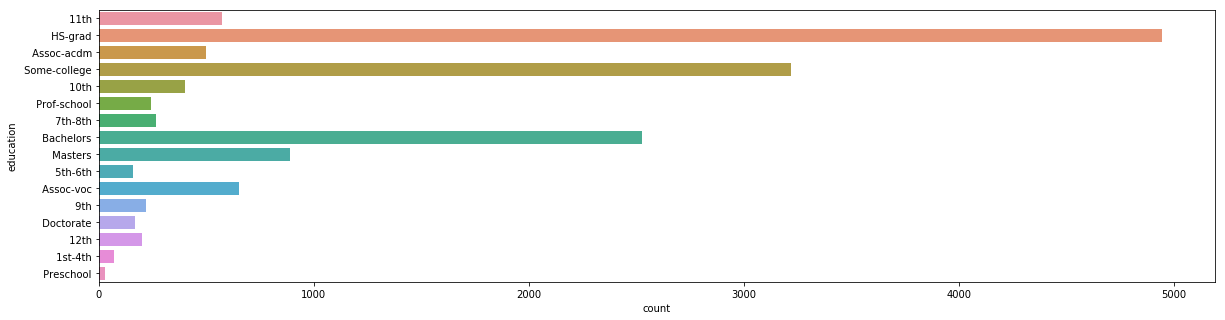

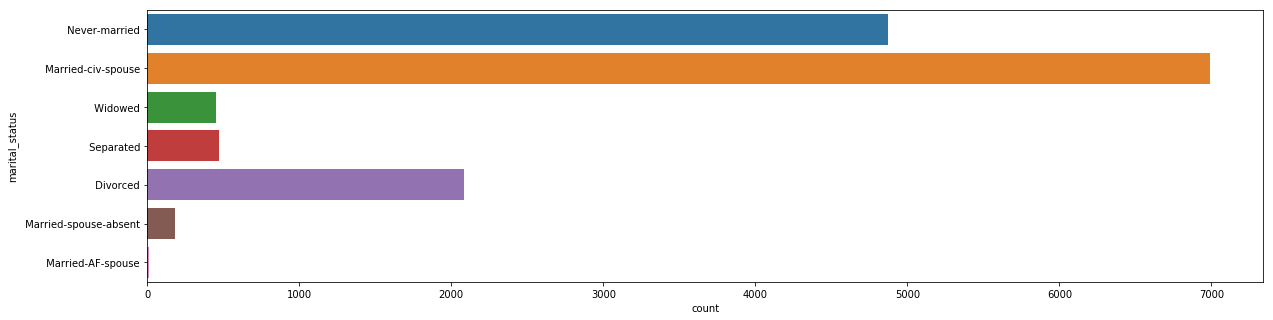

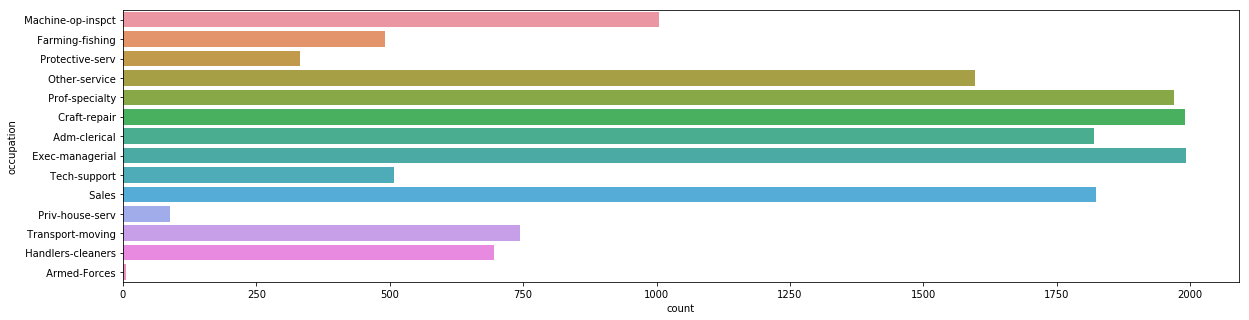

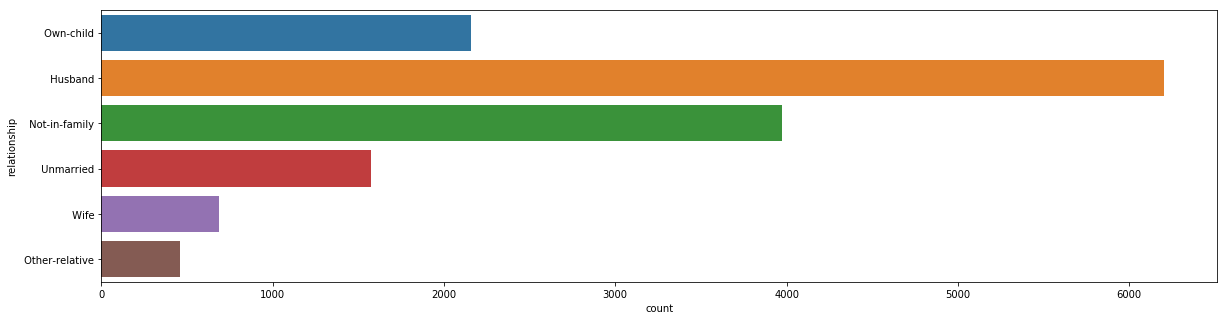

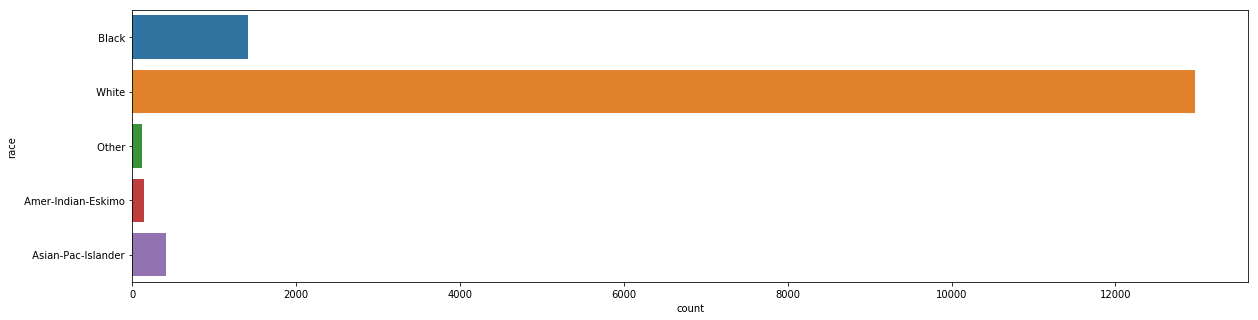

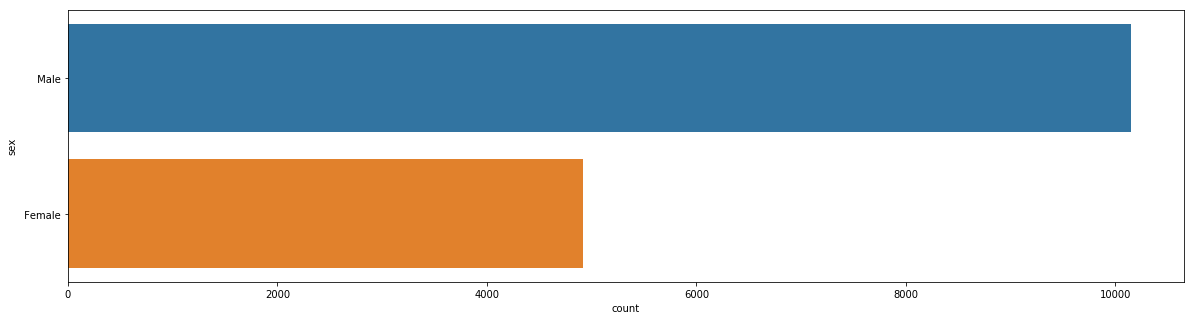

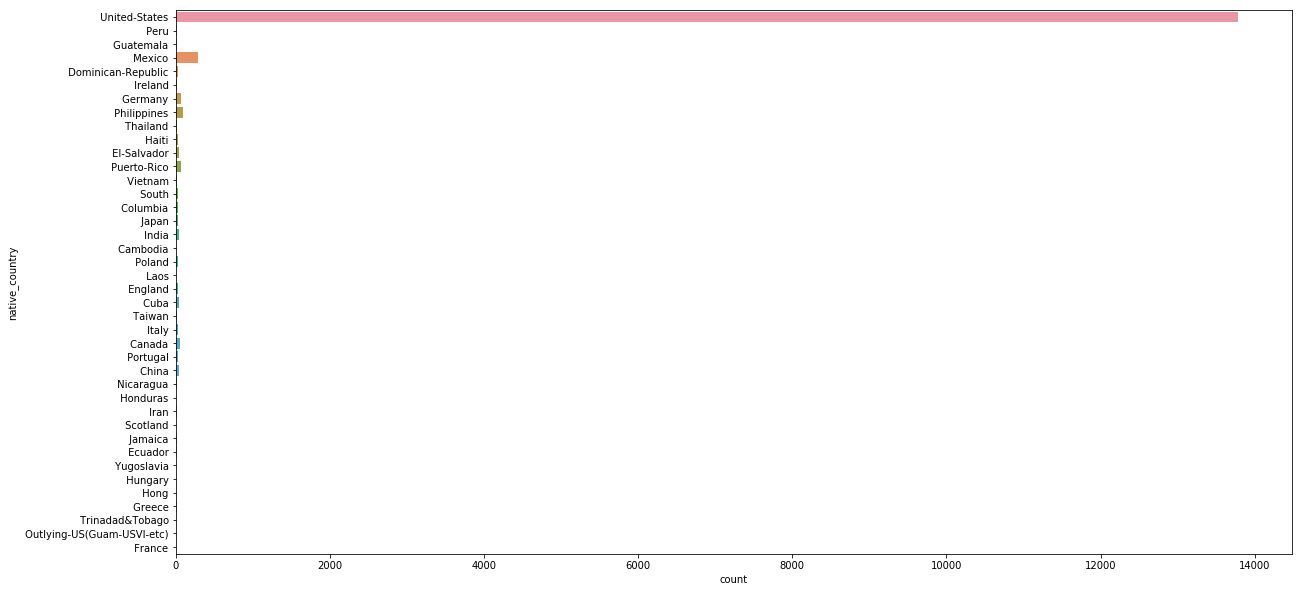

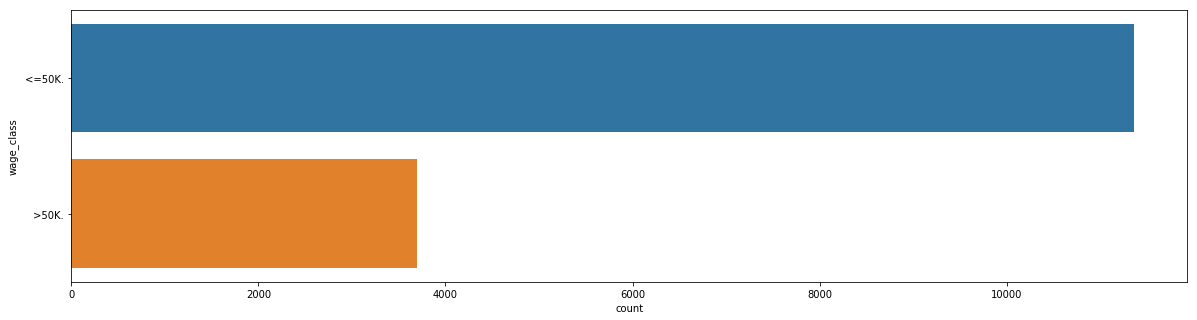

In [54]:
for i, col in enumerate(cat_cols):
    if(col!='native_country'):
        plt.figure(i,figsize = (20,5))
        sns.countplot(y=col, data=test_set)
    else:
        plt.figure(i,figsize = (20,10))
        sns.countplot(y=col, data=test_set)

## Bi-variate

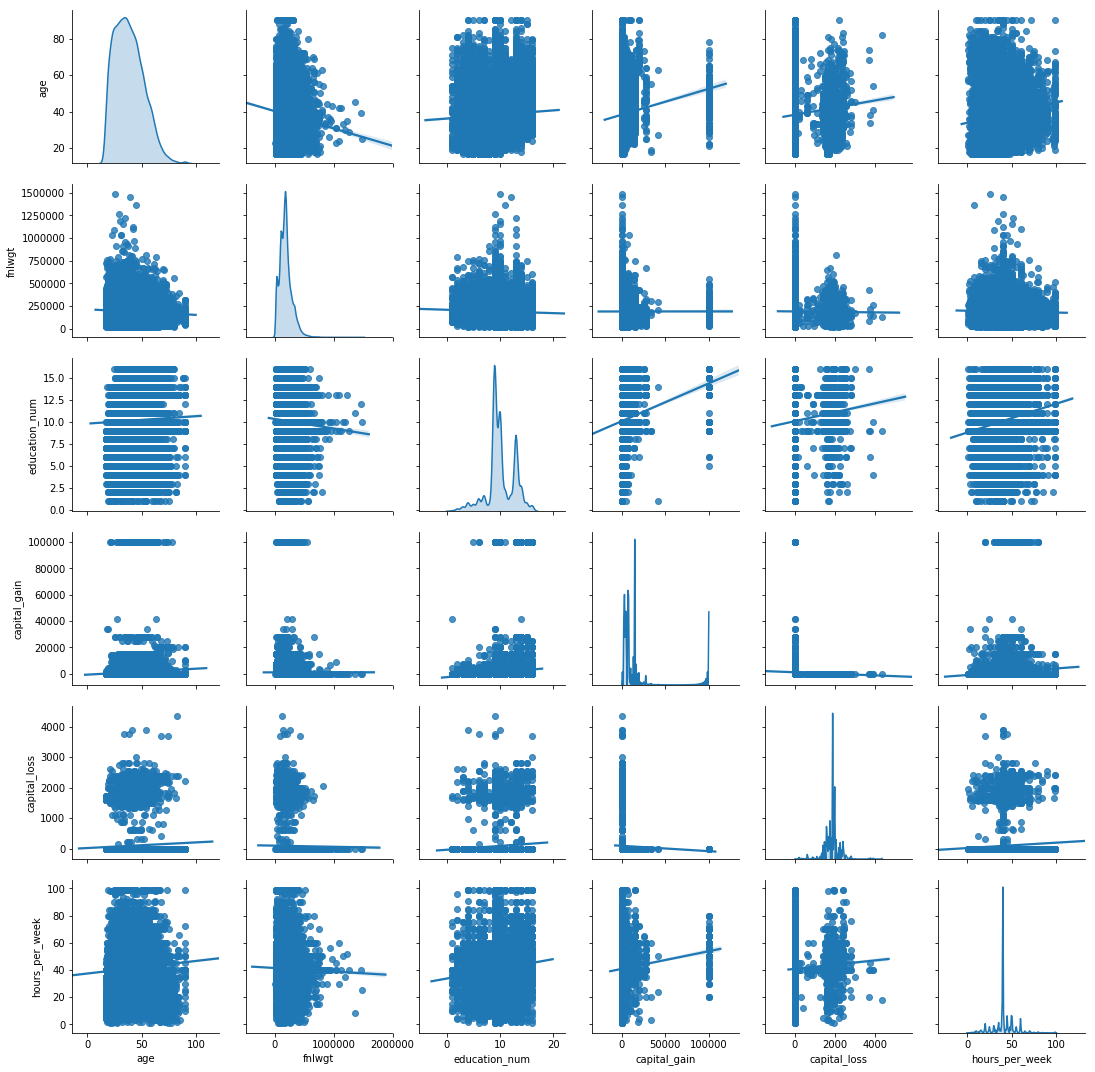

In [55]:
sns.pairplot(train_set[num_cols],kind ='reg',diag_kind='kde')

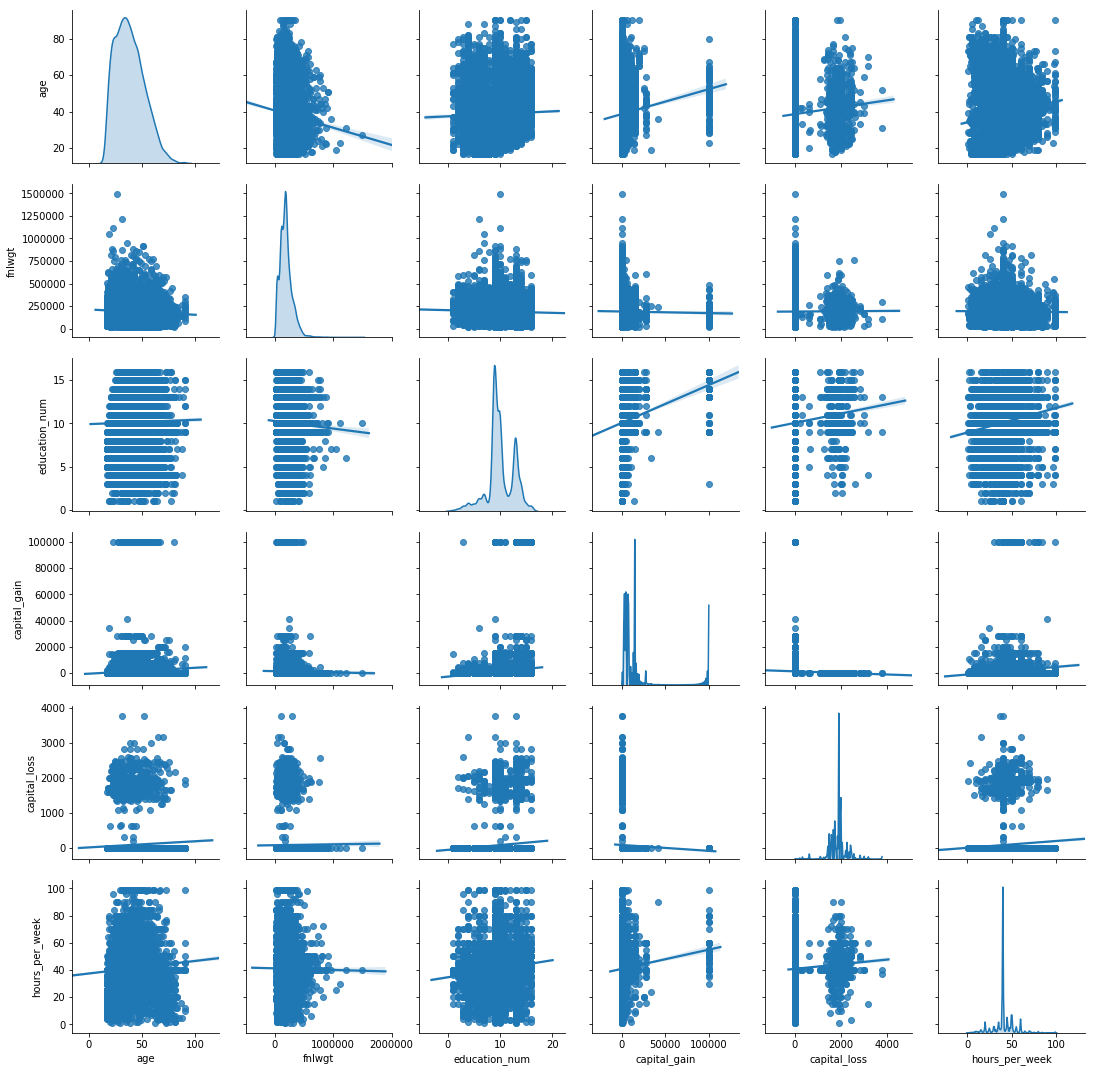

In [56]:
sns.pairplot(test_set[num_cols],kind ='reg',diag_kind='kde')

***None of the numerical columns are strongly correlated with each other, either in train_set or test_set. However, it is interesting to note that education is more correlated with capital_gain than capital_loss***

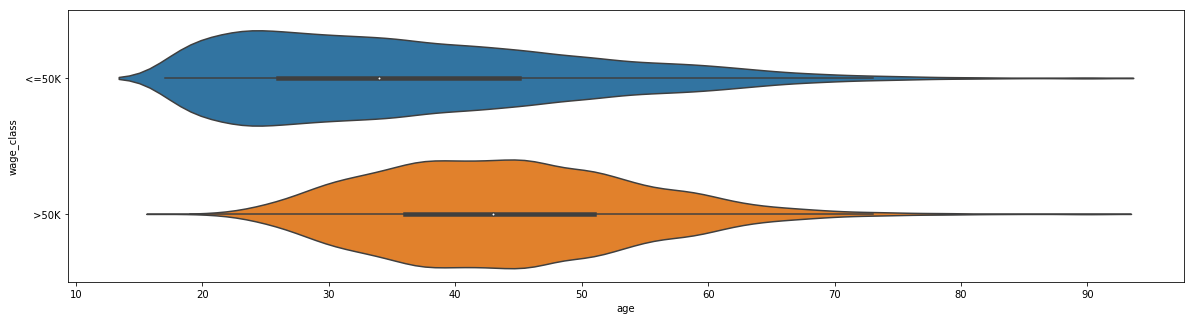

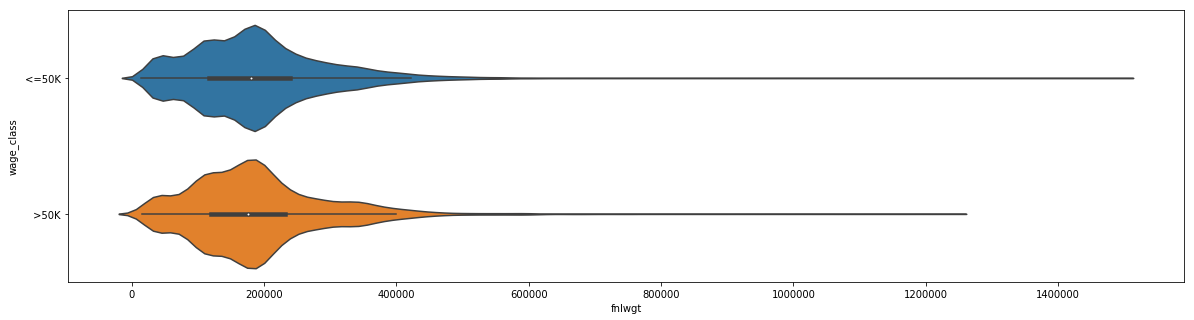

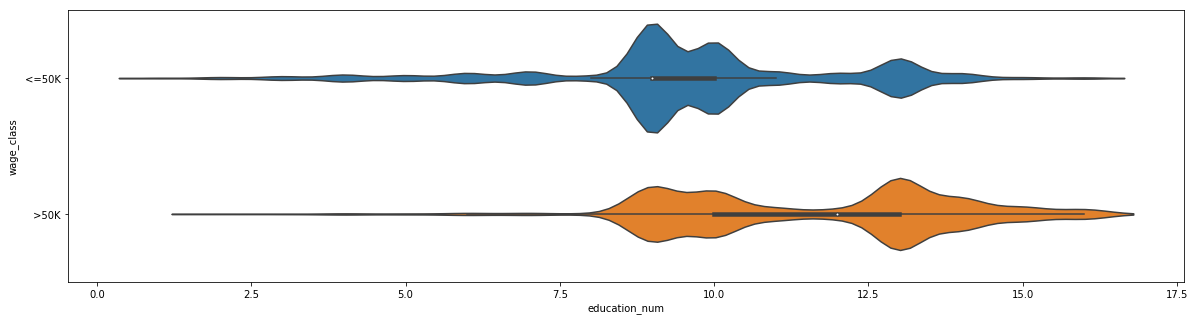

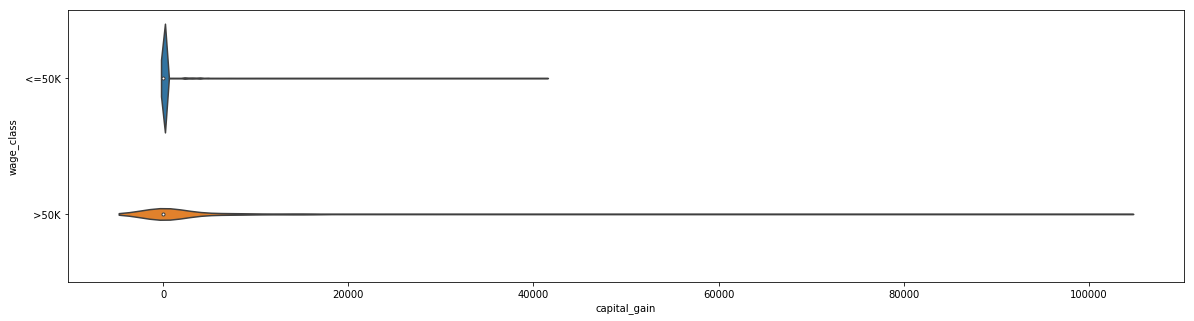

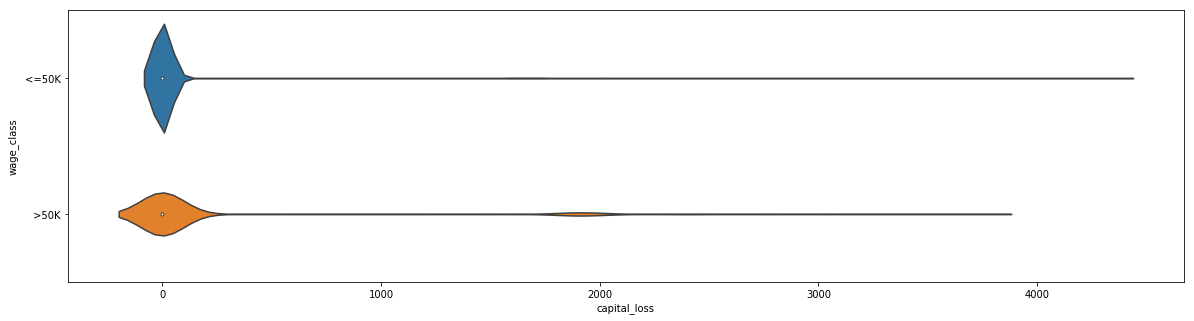

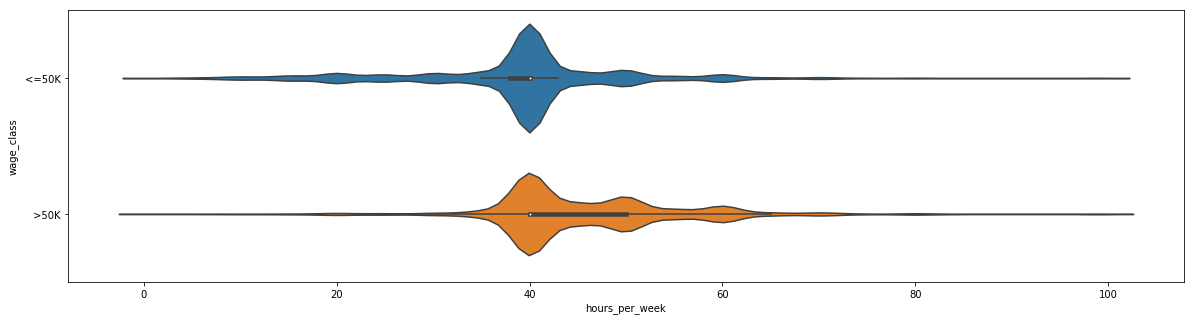

In [57]:
for i, col in enumerate(num_cols):
    plt.figure(i,figsize = (20,5))
    sns.violinplot(x=col,y='wage_class', data=train_set)

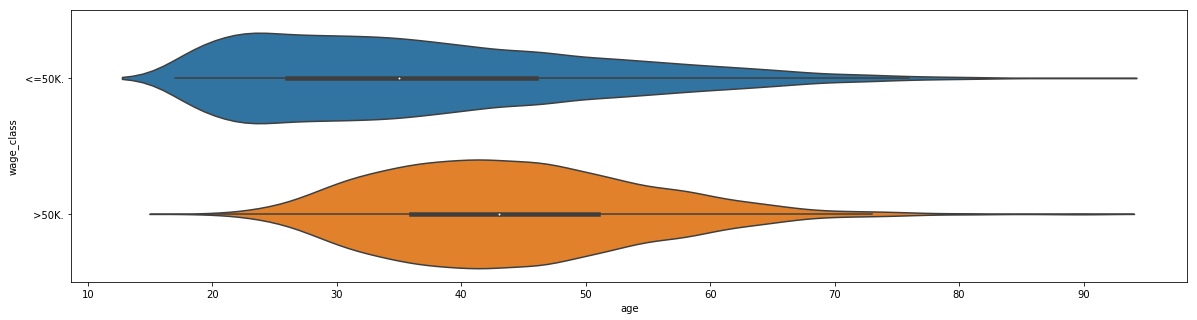

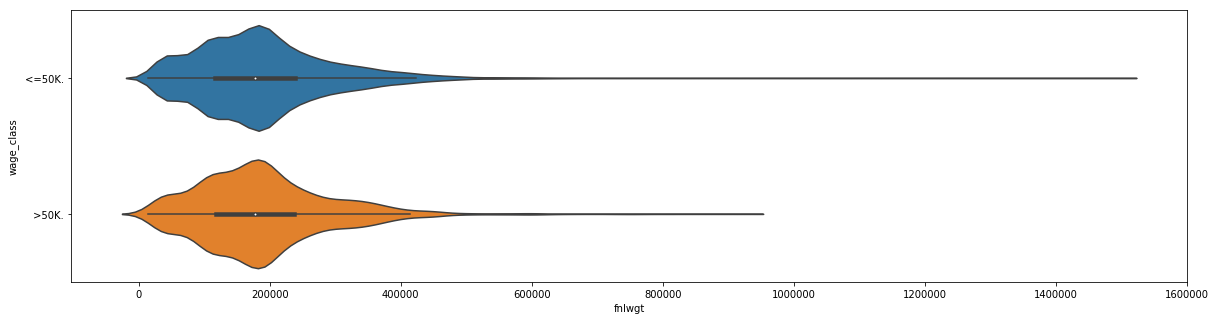

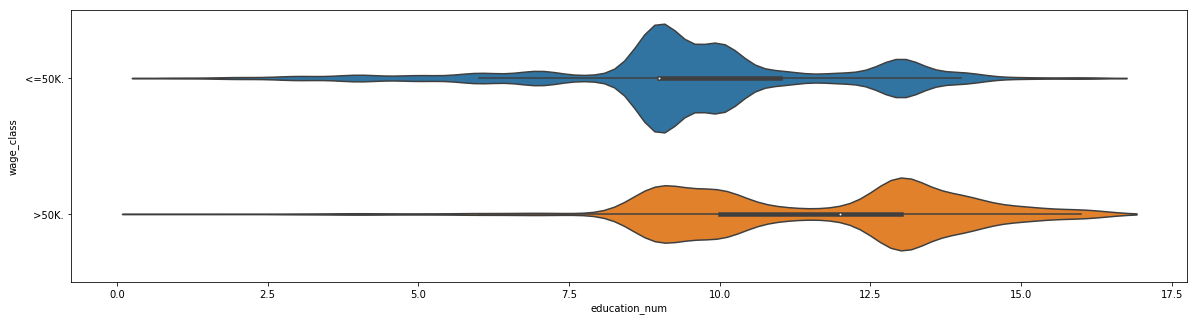

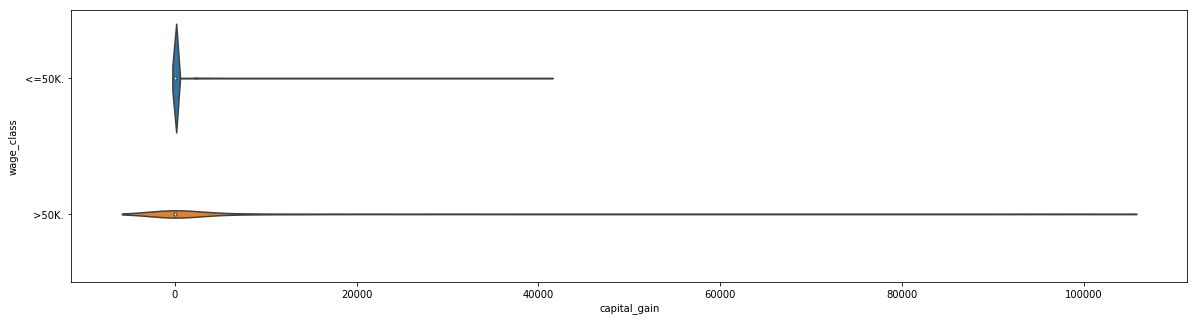

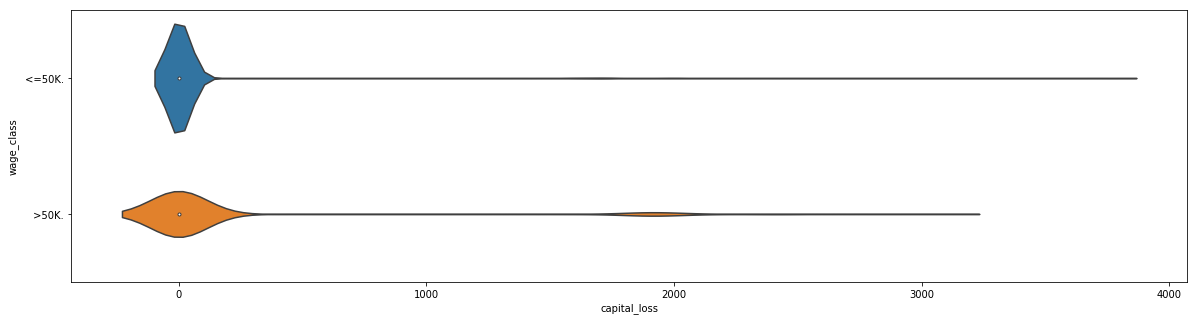

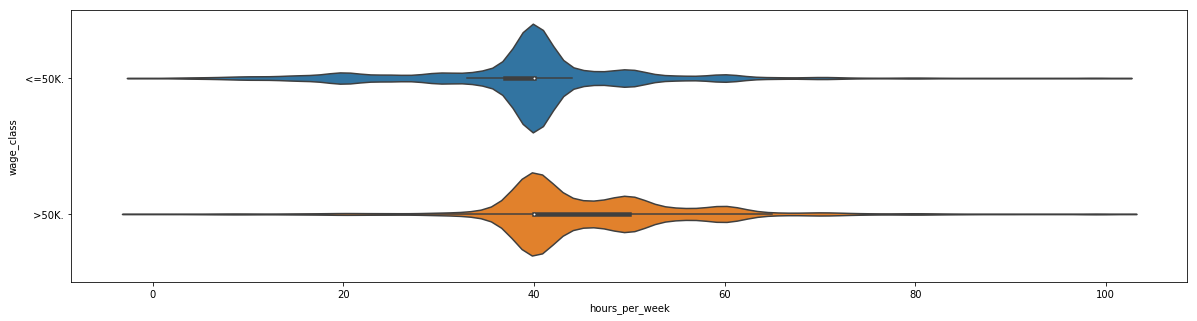

In [58]:
for i, col in enumerate(num_cols):
    plt.figure(i,figsize = (20,5))
    sns.violinplot(x=col,y='wage_class', data=test_set)

## Multi-variate

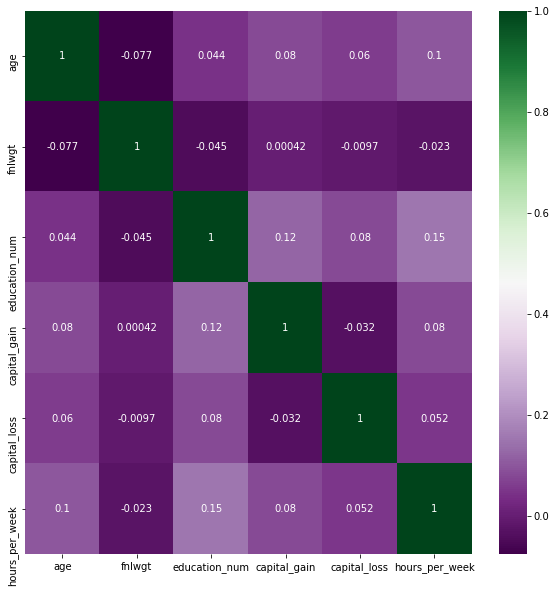

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr(), annot = True,cmap= "PRGn")

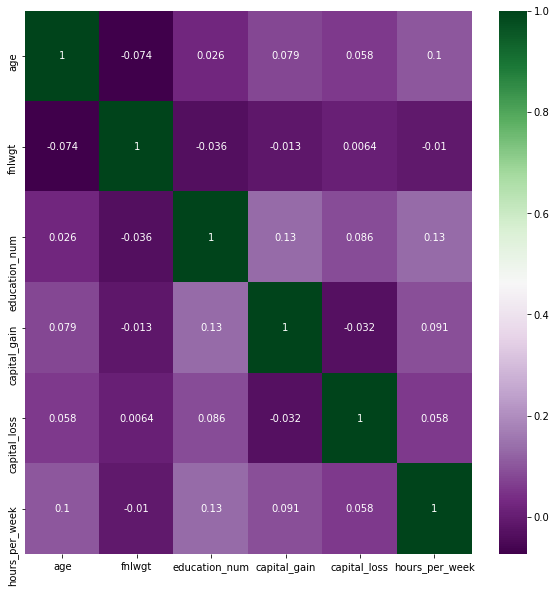

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(test_set.corr(), annot = True,cmap= "PRGn")

# Engineer Features

## Encode Categorical Columns

In [61]:
for col in train_set.columns: # Loop through all columns in the dataframe
    if train_set[col].dtype == 'object': # Only apply for columns with categorical strings
        train_set[col] = pd.Categorical(train_set[col]).codes # Replace strings with an integer

In [62]:
for col in test_set.columns: # Loop through all columns in the dataframe
    if test_set[col].dtype == 'object': # Only apply for columns with categorical strings
        test_set[col] = pd.Categorical(test_set[col]).codes # Replace strings with an integer

# Generate Input Vector X and Output Y, and Split the Data for Training and Testing

In [63]:
x_train = train_set.drop('wage_class', axis =1)
y_train = train_set['wage_class']
x_test = test_set.drop('wage_class', axis =1)
y_test = test_set['wage_class']

In [64]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30162, 14), (30162,), (15060, 14), (15060,))

# Fit the Base Models and Collect the Metrics

## Logistic Regression

In [65]:
log_res = LogisticRegression()
model_lr = log_res.fit(x_train, y_train)

y_test_pred = model_lr.predict(x_test)

y_test_pred_prob = model_lr.predict_proba(x_test)

model_lr.score(x_test,y_test)

0.7847941567065073

In [66]:
# Generate model evaluation metrics for the Logistic Regression
print("Performance metrics of the model for the Logistic Regression")
print("-"*100)
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision Score: ",metrics.precision_score(y_test, y_test_pred))
print("Recall Score: ",metrics.recall_score(y_test, y_test_pred))
print("AUROC Score: ",metrics.roc_auc_score(y_test,  y_test_pred_prob[:,1]))
print()
print("Confusion Matrix:  \n ",metrics.confusion_matrix(y_test, y_test_pred))
print()
print("Classification Report:\n ",metrics.classification_report(y_test, y_test_pred))

Performance metrics of the model for the Logistic Regression
----------------------------------------------------------------------------------------------------
Accuracy:  0.7847941567065073
Precision Score:  0.6284275321768327
Recall Score:  0.3035135135135135
AUROC Score:  0.7567870551008756

Confusion Matrix:  
  [[10696   664]
 [ 2577  1123]]

Classification Report:
               precision    recall  f1-score   support

          0       0.81      0.94      0.87     11360
          1       0.63      0.30      0.41      3700

avg / total       0.76      0.78      0.76     15060



## XGBoost Base Model

In [67]:
params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
XGB_base = XGBClassifier(**params)

XGB_base.fit(x_train, y_train)

y_test_pred = XGB_base.predict(x_test)
y_test_pred_prob = XGB_base.predict_proba(x_test)

XGB_base.score(x_test,y_test)

0.8663346613545817

In [68]:
# Generate model evaluation metrics for the XGBOOST- Base Model
print("Performance metrics of the model for the XGBOOST- Base Model")
print("-"*100)
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision Score: ",metrics.precision_score(y_test, y_test_pred))
print("Recall Score: ",metrics.recall_score(y_test, y_test_pred))
print("AUROC Score: ",metrics.roc_auc_score(y_test,  y_test_pred_prob[:,1]))
print()
print("Confusion Matrix:  \n ",metrics.confusion_matrix(y_test, y_test_pred))
print()
print("Classification Report:\n ",metrics.classification_report(y_test, y_test_pred))

Performance metrics of the model for the XGBOOST- Base Model
----------------------------------------------------------------------------------------------------
Accuracy:  0.8663346613545817
Precision Score:  0.8172245204964272
Recall Score:  0.5872972972972973
AUROC Score:  0.9248164969547013

Confusion Matrix:  
  [[10874   486]
 [ 1527  2173]]

Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.96      0.92     11360
          1       0.82      0.59      0.68      3700

avg / total       0.86      0.87      0.86     15060



# Select Features

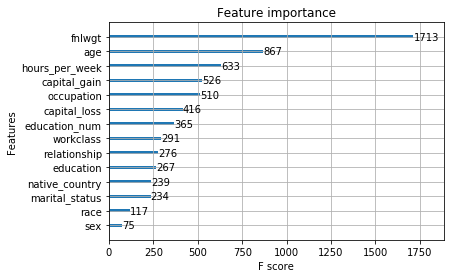

In [69]:
xgb.plot_importance(XGB_base)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

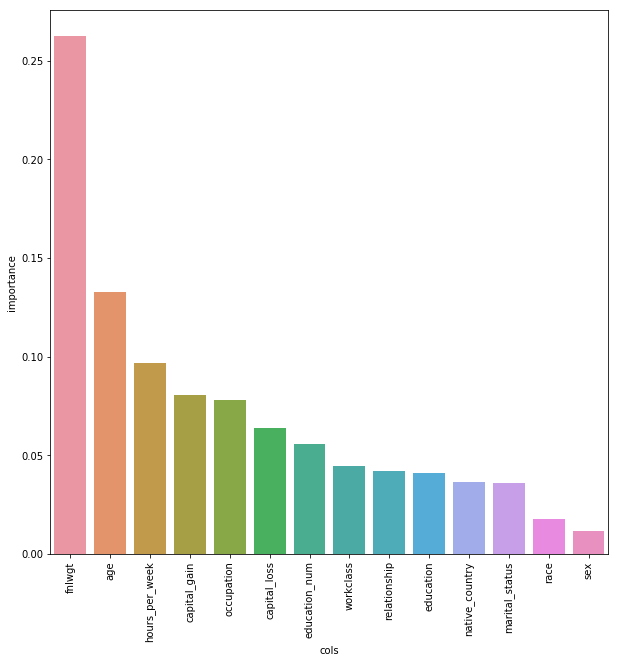

In [70]:
importance = pd.DataFrame.from_dict({'cols':x_train.columns, 'importance': XGB_base.feature_importances_})
importance = importance.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

In [71]:
imp_cols = importance[importance.importance >= 0.03].cols.values
imp_cols

array(['fnlwgt', 'age', 'hours_per_week', 'capital_gain', 'occupation',
       'capital_loss', 'education_num', 'workclass', 'relationship',
       'education', 'native_country', 'marital_status'], dtype=object)

In [72]:
params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
XGB_feat_rem1 = XGBClassifier(**params)

XGB_feat_rem1.fit(x_train[imp_cols], y_train)

y_test_pred = XGB_feat_rem1.predict(x_test[imp_cols])
y_test_pred_prob = XGB_feat_rem1.predict_proba(x_test[imp_cols])
 
XGB_feat_rem1.score(x_test[imp_cols],y_test)

0.8667994687915007

In [73]:
# Generate model evaluation metrics for the XGBOOST- Feature Importance Threshold = 0.03
print("Performance metrics of the model for the XGBOOST- Feature Importance Threshold = 0.03")
print("-"*100)
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision Score: ",metrics.precision_score(y_test, y_test_pred))
print("Recall Score: ",metrics.recall_score(y_test, y_test_pred))
print("AUROC Score: ",metrics.roc_auc_score(y_test,  y_test_pred_prob[:,1]))
print()
print("Confusion Matrix:  \n ",metrics.confusion_matrix(y_test, y_test_pred))
print()
print("Classification Report:\n ",metrics.classification_report(y_test, y_test_pred))

Performance metrics of the model for the XGBOOST- Feature Importance Threshold = 0.03
----------------------------------------------------------------------------------------------------
Accuracy:  0.8667994687915007
Precision Score:  0.8245210727969349
Recall Score:  0.5816216216216217
AUROC Score:  0.9254073681956604

Confusion Matrix:  
  [[10902   458]
 [ 1548  2152]]

Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.96      0.92     11360
          1       0.82      0.58      0.68      3700

avg / total       0.86      0.87      0.86     15060



***Our base model with all the features performs better than the model for which features were removed with a feature importance threshold of 0.03.
So we stick with the  model with all the features***

# Validate Model

In [74]:
scoring = 'neg_mean_squared_error'

kfold = KFold(n_splits=10, random_state=7)
cv_results = cross_val_score(XGB_base, x_train,y_train, cv=kfold, scoring=scoring)
print("xGB_Base CV Scores:","\n\t CV-Mean:", cv_results.mean(),
                    "\n\t CV-Std. Dev:",  cv_results.std(),"\n")

xGB_Base CV Scores: 
	 CV-Mean: -0.13155633769382874 
	 CV-Std. Dev: 0.00493050943479764 



***We have good CV mean and Std deviation score for XGB_base, however, we still need to optimize the hyper-parameters.***

# Optimize or Tune Model for better Performance

In [75]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [76]:
param_grid = {
              'colsample_bylevel':[0.8],
              'colsample_bytree':[0.8],
              'learning_rate':[0.1, 0,2, 0.3],
              'max_depth':[2, 4, 7],
              'min_child_weight':[1, 3], 
              'n_estimators':[200],
              'n_jobs':[-1], 
              'objective':['binary:logistic'],
              'random_state':[100],
              'reg_alpha':[0.1, 1, 10], 
              'scale_pos_weight':[1], 
              'silent':[True]}

XGB_grid = GridSearchCV(XGBClassifier(), param_grid=param_grid,cv = 5, verbose=1)

In [77]:
XGB_grid.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 11.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'colsample_bylevel': [0.8], 'colsample_bytree': [0.8], 'learning_rate': [0.1, 0, 2, 0.3], 'max_depth': [2, 4, 7], 'min_child_weight': [1, 3], 'n_estimators': [200], 'n_jobs': [-1], 'objective': ['binary:logistic'], 'random_state': [100], 'reg_alpha': [0.1, 1, 10], 'scale_pos_weight': [1], 'silent': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [78]:
XGB_grid.best_params_

{'colsample_bylevel': 0.8,
 'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 200,
 'n_jobs': -1,
 'objective': 'binary:logistic',
 'random_state': 100,
 'reg_alpha': 0.1,
 'scale_pos_weight': 1,
 'silent': True}

In [79]:
model = XGB_grid.best_estimator_
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

In [80]:
model.score(x_test, y_test)

0.8686586985391767

In [81]:
# Generate model evaluation metrics for the XGBOOST - Hyperparameter tuned
print("Performance metrics of the model for the XGBOOST - Hyperparameter tuned")
print("-"*100)
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision Score: ",metrics.precision_score(y_test, y_test_pred))
print("Recall Score: ",metrics.recall_score(y_test, y_test_pred))
print("AUROC Score: ",metrics.roc_auc_score(y_test,  y_test_pred_prob[:,1]))
print()
print("Confusion Matrix:  \n ",metrics.confusion_matrix(y_test, y_test_pred))
print()
print("Classification Report:\n ",metrics.classification_report(y_test, y_test_pred))

Performance metrics of the model for the XGBOOST - Hyperparameter tuned
----------------------------------------------------------------------------------------------------
Accuracy:  0.8686586985391767
Precision Score:  0.7910750507099391
Recall Score:  0.6324324324324324
AUROC Score:  0.9254073681956604

Confusion Matrix:  
  [[10742   618]
 [ 1360  2340]]

Classification Report:
               precision    recall  f1-score   support

          0       0.89      0.95      0.92     11360
          1       0.79      0.63      0.70      3700

avg / total       0.86      0.87      0.86     15060



# Choose the model for deployment

***We chose the hyperparameter tuned model because it has the better accuracy score as all other average metrics(from classification report) are the same.***

In [82]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=3, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [83]:
import pickle
chosen_model = pickle.dumps(model)

pickle.loads(chosen_model)